Files already downloaded and verified
Files already downloaded and verified


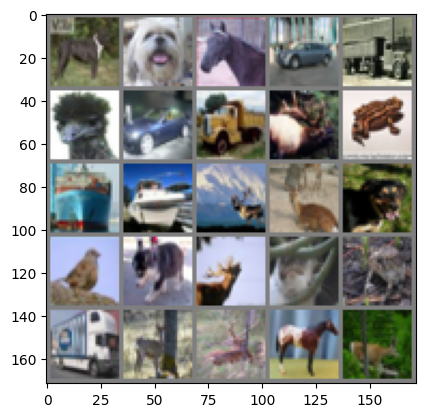

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


num_epochs = 10
batch_size = 32
learning_rate = 0.001

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

train_data = torchvision.datasets.CIFAR10(root="./data",train=True,download=True,transform=transform)
test_data = torchvision.datasets.CIFAR10(root="./data",train=False,download=True,transform=transform)

train_loader = torch.utils.data.DataLoader(train_data,batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,batch_size,shuffle=False)

classes = ("plane","car","bird","deer","dog","frog","horse","ship","truck")

def imshow(imgs):
  imgs = imgs/2 + 0.5
  npimgs = imgs.numpy()
  plt.imshow(np.transpose(npimgs,(1,2,0)))
  plt.show()

dataiter = iter(train_loader)
images,labels = next(dataiter)
img_grid = torchvision.utils.make_grid(images[0:25],nrow=5)

imshow(img_grid)







In [9]:
class ConvNet(nn.Module):
  def __init__(self,):
    super().__init__()
    self.conv1 = nn.Conv2d(3,32,3)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(32,64,3)
    self.conv3 = nn.Conv2d(64,64,3)
    self.fc1 = nn.Linear(64*4*4,64)
    self.fc2 = nn.Linear(64,10)



  def forward(self,x):
    x = F.relu(self.conv1(x))
    x = self.pool(x)
    x = F.relu(self.conv2(x))
    x = self.pool(x)
    x = F.relu(self.conv3(x))
    x = torch.flatten(x,1)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)

    return x



model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(),lr=learning_rate)


n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  running_loss = 0.0

  for i,(images,labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)

    outputs = model(images)
    loss = criterion(outputs,labels)

    loss.backward()
    optim.step()
    optim.zero_grad()

    running_loss += loss.item()


  print(f"[{epoch+1}] loss: {running_loss/n_total_steps:.3f}")


print("Finished Trainnig")
PATH = "./cnn_eg,pth"
torch.save(model.state_dict(),PATH)




[1] loss: 1.447
[2] loss: 1.089
[3] loss: 0.911
[4] loss: 0.802
[5] loss: 0.720
[6] loss: 0.662
[7] loss: 0.606
[8] loss: 0.562
[9] loss: 0.516
[10] loss: 0.474
Finished Trainnig


In [11]:
loaded_model = ConvNet()
loaded_model.load_state_dict(torch.load(PATH))
loaded_model.to(device)
loaded_model.eval()


with torch.no_grad():
  n_correct = 0
  n_correct2 = 0
  n_samples = len(test_loader.dataset)

  for images,labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = loaded_model(images)

    _, predicted = torch.max(outputs,1)
    n_correct += (predicted == labels).sum().item()

    output2 = loaded_model(images)
    _, predicted2 = torch.max(output2,1)
    n_correct2 += (predicted2 == labels).sum().item()


  accuracy = (100.0*n_correct)/n_samples
  print(f"Accuracy of the model: {accuracy}%")

  accuracy = (100.0*n_correct2)/n_samples
  print(f"Accuracy of the model: {accuracy}%")



<ipython-input-11-0e13e1f759bf>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(PATH))


Accuracy of the model: 73.65%
Accuracy of the model: 73.65%
